# **First Project: Developing NLP Model Using TensorFlow**

**Name: Nicko Arya Dharma**   
**Email: nicko.arya.dharma@gmail.com**   
**DicodingID: nickoaryad**  

## **1 <font color='yellow'>**|**</font> About the Dataset**

Context
News article datasets, originating from BBC News, provided for use as benchmarks for machine learning research. The original data is processed to form a single csv file for ease of use, the news title and the related text file name is preserved along with the news content and its category. This dataset is made available for non-commercial and research purposes only.

All rights, including copyright, in the content of the original articles are owned by the BBC.

Content:   
Consists of 2225 documents from the BBC news website corresponding to stories in five topical areas from 2004-2005.

Class Labels:  
5 (business, entertainment, politics, sport, tech)

Acknowledgements:   
The original source of the data may be accessed through this link and it might be interesting to read the associated research article.

Associated Official Research Papers:   
D. Greene and P. Cunningham. "Practical Solutions to the Problem of Diagonal Dominance in Kernel Document Clustering", Proc. ICML 2006.

Source:   
https://www.kaggle.com/datasets/hgultekin/bbcnewsarchive/data

## **2 <font color='yellow'>**|**</font> Importing Libraries**

In [1]:
import zipfile

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, Dropout, BatchNormalization, Flatten, LSTM
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import plot_model

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
!pip install wordcloud

import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

import re, string, unicodedata
from string import punctuation

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## **3 <font color='yellow'>**|**</font> Preparing the Dataset**

#### **3.1 <font color='yellow'>**|**</font> Extracting the Dataset**

In [2]:
local_zip = '/bbc-news-data.csv.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

#### **3.2 <font color='yellow'>**|**</font> Reading the Dataset**

In [3]:
data = pd.read_csv('/tmp/bbc-news-data.csv', on_bad_lines='skip', sep='\t')
data

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   filename  2225 non-null   object
 2   title     2225 non-null   object
 3   content   2225 non-null   object
dtypes: object(4)
memory usage: 69.7+ KB


In [5]:
data.category.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

<Axes: >

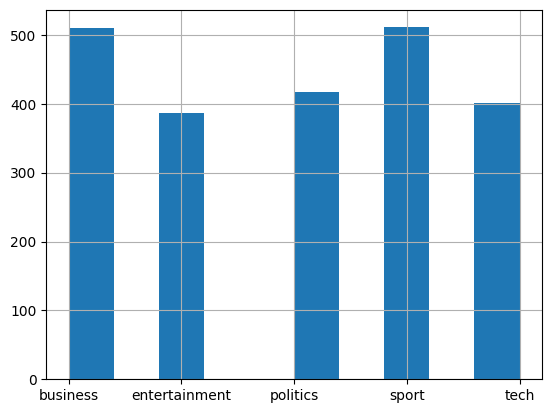

In [6]:
data["category"].hist()

In [7]:
heading_sport = data[data["category"]=="sport"]["title"]
collapsed_heading_sport = heading_sport.str.cat(sep=' ')

heading_business  = data[data["category"]=="sport"]["title"]
collapsed_heading_business = heading_sport.str.cat(sep=' ')

heading_politics  = data[data["category"]=="sport"]["title"]
collapsed_heading_politics = heading_sport.str.cat(sep=' ')

heading_tech  = data[data["category"]=="sport"]["title"]
collapsed_heading_tech = heading_sport.str.cat(sep=' ')

heading_entertainment  = data[data["category"]=="sport"]["title"]
collapsed_heading_entertainment = heading_sport.str.cat(sep=' ')

Word Cloud for SPORT


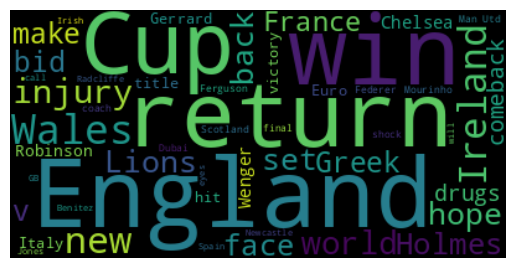

In [8]:
print("Word Cloud for SPORT")
wordcloud = WordCloud(background_color = "black",max_words = 50).generate(collapsed_heading_sport)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

Word Cloud for BUSINESS


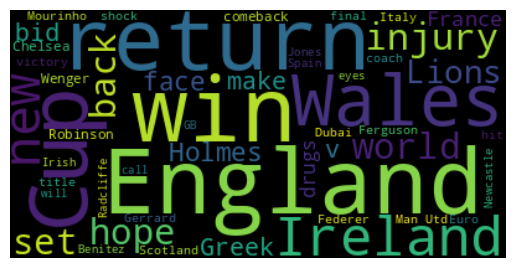

In [9]:
print("Word Cloud for BUSINESS")
wordcloud = WordCloud(background_color = "black",max_words = 50).generate(collapsed_heading_business)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

Word Cloud for POLITICS


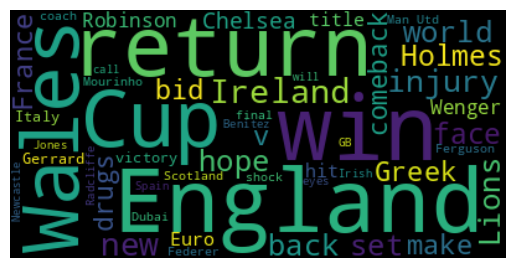

In [10]:
print("Word Cloud for POLITICS")
wordcloud = WordCloud(background_color = "black",max_words = 50).generate(collapsed_heading_politics)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

Word Cloud for TECH


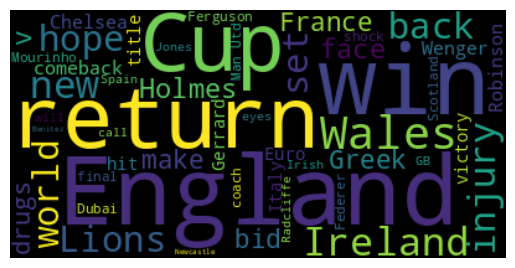

In [11]:
print("Word Cloud for TECH")
wordcloud = WordCloud(background_color = "black",max_words = 50).generate(collapsed_heading_tech)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

Word Cloud for ENTERTAINMENT


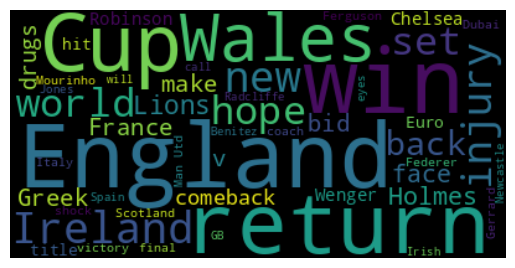

In [12]:
print("Word Cloud for ENTERTAINMENT")
wordcloud = WordCloud(background_color = "black",max_words = 50).generate(collapsed_heading_entertainment)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

#### **3.3 <font color='yellow'>**|**</font> Wrangling the Dataset**

In [13]:
# Removing unnecessary column
data = data.drop(columns=['filename'])

# Combining title and content columns
data['text'] = data['title'] + " " + data['content']

# Renaming column
data.columns = ['Category', 'Title', 'Content', 'Text']

# Removing title and content columns
data = data.drop(columns=['Title', 'Content'])

# Reindexing columns
data = data.reindex(columns=['Text', 'Category'])

data

,Text,Category
0,Ad sales boost Time Warner profit Quarterly p...,business
1,Dollar gains on Greenspan speech The dollar h...,business
2,Yukos unit buyer faces loan claim The owners ...,business
3,High fuel prices hit BA's profits British Air...,business
4,Pernod takeover talk lifts Domecq Shares in U...,business
...,...,...
2220,BT program to beat dialler scams BT is introd...,tech
2221,Spam e-mails tempt net shoppers Computer user...,tech
2222,Be careful how you code A new European direct...,tech
2223,US cyber security chief resigns The man makin...,tech


In [14]:
# Inspecting any NaN data
data.isna().sum()

Text        0
Category    0
dtype: int64

In [15]:
# Inspecting any null data
data.isnull().sum()

Text        0
Category    0
dtype: int64

## **4 <font color='yellow'>**|**</font> Preprocessing Text**

In [17]:
# Removing unnecessary whitespace, punctuation, and characters
def preprocess(text):
    text = text.lower() #convert to lowercase
    text = text.strip()  #remove any whitespace
    text = re.compile('<.*?>').sub('', text) #remove any HTML tags
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text) #replace punctuation with space
    text = re.sub('\s+', ' ', text) #remove extra space and tabs
    text = re.sub(r'\[[0-9]*\]',' ', text) #[0-9] matches any digit (0 to 10000...)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ', text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = re.sub(r'\s+',' ', text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace
    return text

In [18]:
# Removing stopwords
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

In [19]:
# Initializing the stemmer
snow = SnowballStemmer('english')
def stemming(string):
    a=[snow.stem(i) for i in word_tokenize(string) ]
    return " ".join(a)

In [20]:
# Initializing the lemmatizer
wl = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [21]:
# Tokenizing the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string))
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)]
    return " ".join(a)

In [22]:
# Executing the preprocess batches
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

data['Text'] = data['Text'].apply(lambda x: finalpreprocess(x))
data.head()

,Text,Category
0,ad sale boost time warner profit quarterly pro...,business
1,dollar gain greenspan speech dollar hit high l...,business
2,yukos unit buyer face loan claim owner embattl...,business
3,high fuel price hit ba profit british airway b...,business
4,pernod takeover talk lift domecq share uk drin...,business


## **5 <font color='yellow'>**|**</font> Encoding Dummy Variable**

In [23]:
category = pd.get_dummies(data.Category)
data = pd.concat([data, category], axis=1)
data = data.drop(columns=['Category'])
data

,Text,business,entertainment,politics,sport,tech
0,ad sale boost time warner profit quarterly pro...,1,0,0,0,0
1,dollar gain greenspan speech dollar hit high l...,1,0,0,0,0
2,yukos unit buyer face loan claim owner embattl...,1,0,0,0,0
3,high fuel price hit ba profit british airway b...,1,0,0,0,0
4,pernod takeover talk lift domecq share uk drin...,1,0,0,0,0
...,...,...,...,...,...,...
2220,bt program beat dialler scam bt introduce two ...,0,0,0,0,1
2221,spam e mail tempt net shopper computer user ac...,0,0,0,0,1
2222,careful code new european directive could put ...,0,0,0,0,1
2223,u cyber security chief resign man make sure u ...,0,0,0,0,1


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Text           2225 non-null   object
 1   business       2225 non-null   uint8 
 2   entertainment  2225 non-null   uint8 
 3   politics       2225 non-null   uint8 
 4   sport          2225 non-null   uint8 
 5   tech           2225 non-null   uint8 
dtypes: object(1), uint8(5)
memory usage: 28.4+ KB


## **6 <font color='yellow'>**|**</font> Splitting the Dataset**

In [25]:
X = data['Text'].values
y = data[['sport', 'business', 'politics', 'tech', 'entertainment']].values

In [26]:
X

array(['ad sale boost time warner profit quarterly profit u medium giant timewarner jump bn three month december year earlier firm one big investor google benefit sale high speed internet connection higher advert sale timewarner say fourth quarter sale rise bn bn profit buoy one gain offset profit dip warner bros less user aol time warner say friday own search engine google internet business aol mixed fortune lose subscriber fourth quarter profit lower precede three quarter however company say aol underlying profit exceptional item rise back strong internet advertising revenue hop increase subscriber offer online service free timewarner internet customer try sign aol exist customer high speed broadband timewarner also restate result follow probe u security exchange commission sec close conclude time warner fourth quarter profit slightly good analyst expectation film division saw profit slump help box office flop alexander catwoman sharp contrast year earlier third final film lord ring 

In [27]:
y

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]], dtype=uint8)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [29]:
print('Train Set:         ', X_train.shape, y_train.shape)
print('Test Set:         ', X_test.shape, y_test.shape)

Train Set:          (1780,) (1780, 5)
Test Set:          (445,) (445, 5)


## **7 <font color='yellow'>**|**</font> Developing Model**

#### **7.1 <font color='yellow'>**|**</font> Tokenizing**

In [30]:
tokenizer = Tokenizer(num_words=10000, oov_token="<oov>")
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

seq_train = tokenizer.texts_to_sequences(X_train)
seq_test = tokenizer.texts_to_sequences(X_test)

pad_train = pad_sequences(seq_train, maxlen=200, truncating="post")
pad_test = pad_sequences(seq_test, maxlen=200, truncating="post")

print("Padded Train = ")
print(pad_train.shape)
print("Padded Test = ")
print(pad_test.shape)

Padded Train = 
(1780, 200)
Padded Test = 
(445, 200)


In [31]:
pad_train

array([[1562,   79, 3925, ...,    1,    2,  423],
       [ 419,  501,  431, ...,  487,  133,    1],
       [  90,  189, 1386, ...,  312, 1064,   73],
       ...,
       [   0,    0,    0, ..., 5363,   59,  170],
       [  15,   79,  954, ...,  974, 2396,   97],
       [   0,    0,    0, ..., 8392, 4282,  199]], dtype=int32)

In [32]:
pad_test

array([[2767, 2724,    1, ...,  129, 2038, 2786],
       [   1, 3280, 2651, ..., 2887, 1686, 3944],
       [   0,    0,    0, ...,  145,  169, 1984],
       ...,
       [ 778,  889,  229, ..., 1873,  178,   67],
       [ 613, 1074, 5561, ...,    6,  861,  345],
       [8363,  507,  147, ...,   13,   72,    8]], dtype=int32)

#### **7.2 <font color='yellow'>**|**</font> Sequential Modelling using Embedding and LSTM**

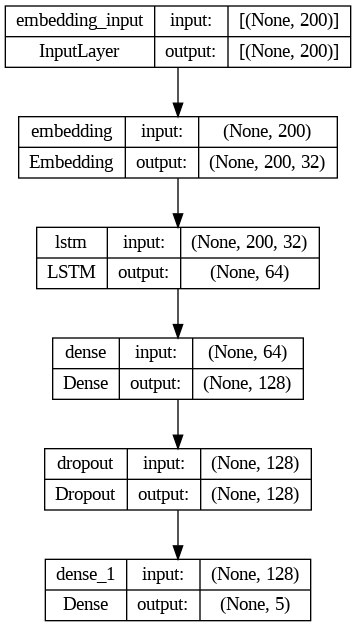

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=32, input_length=200, mask_zero=True),
    tf.keras.layers.LSTM(64, return_sequences=False),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    #tf.keras.layers.LSTM(64),
    #tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5, activation='softmax')
])
plot_model(model, show_shapes = True)

In [34]:
model.compile(optimizer="adam",
              metrics=['accuracy'],
              loss='categorical_crossentropy')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 353797 (1.35 MB)
Trainable params: 353797 (1.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### **7.3 <font color='yellow'>**|**</font> Defining Callbacks to Control Epochs**

In [35]:
# Defining calbacks to stop epoch
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90 and logs.get('val_accuracy')>0.90):
      self.model.stop_training = True
      print("\n Accuracy of the training set and the validation set have reached > 90%!")
callbacks = myCallback()

In [36]:
# Improving validation accuracy by decreasing Learning Rate
auto_reduction_LR = ReduceLROnPlateau(
    monitor = 'val_accuracy',
    patience = 2, # epoch waiting to decrease LR by factor
    verbose = 1,
    factor = 0.1, #factor for decreasing LR
    min_lr = 1.5e-5 #minimum Learning Rate
)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=12,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

#### **7.4 <font color='yellow'>**|**</font> Training the Model Using Fit Function**

In [37]:
num_epochs = 70
history = model.fit(pad_train, y_train,
                    epochs=num_epochs,
                    validation_data=(pad_test, y_test),
                    verbose=2,
                    callbacks=[callbacks, auto_reduction_LR])

Epoch 1/70
56/56 - 15s - loss: 1.5952 - accuracy: 0.2371 - val_loss: 1.5420 - val_accuracy: 0.4697 - lr: 0.0010 - 15s/epoch - 268ms/step
Epoch 2/70
56/56 - 7s - loss: 1.1492 - accuracy: 0.5146 - val_loss: 0.8686 - val_accuracy: 0.6360 - lr: 0.0010 - 7s/epoch - 124ms/step
Epoch 3/70
56/56 - 8s - loss: 0.6303 - accuracy: 0.7753 - val_loss: 0.4364 - val_accuracy: 0.8539 - lr: 0.0010 - 8s/epoch - 146ms/step
Epoch 4/70
56/56 - 7s - loss: 0.1917 - accuracy: 0.9551 - val_loss: 0.3525 - val_accuracy: 0.8854 - lr: 0.0010 - 7s/epoch - 127ms/step
Epoch 5/70

 Accuracy of the training set and the validation set have reached > 90%!
56/56 - 8s - loss: 0.0897 - accuracy: 0.9815 - val_loss: 0.2627 - val_accuracy: 0.9393 - lr: 0.0010 - 8s/epoch - 147ms/step


#### **7.5 <font color='yellow'>**|**</font> Saving the Model for Deployment**

In [38]:
model.save_weights('model_weights.h5')
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **8 <font color='yellow'>**|**</font> Plotting**

#### **8.1 <font color='yellow'>**|**</font> Loss of Training and Validation**

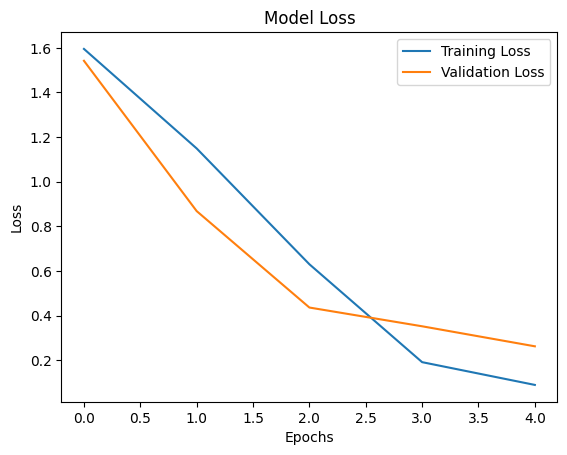

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Validation Loss'], loc = 'upper right')
plt.show()

#### **8.2 <font color='yellow'>**|**</font> Accuracy of Training and Validation**

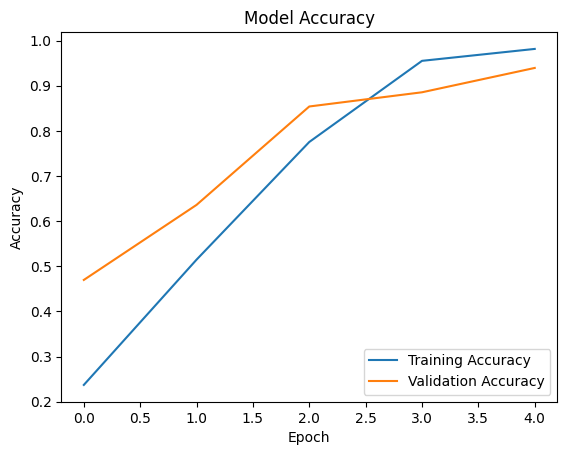

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()